# 🐟 K-최근접 이웃으로 농어의 무게 예측

## 1. 데이터 준비

[농어의 길이와 무게 데이터](http://bit.ly/perch_data) (넘파일 배열 데이터)
- 특성: 농어의 길이
- 타깃: 농어의 무게


In [164]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
1000.0])

Text(0, 0.5, 'weight')

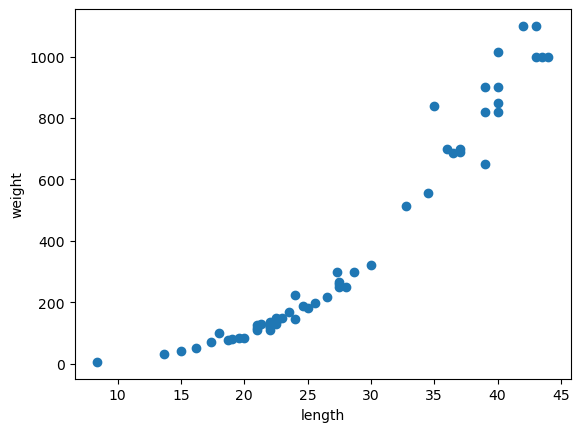

In [165]:
# 산점도
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')

- 농어의 길이가 커질 수록 무게도 늘어나는 것을 볼 수 있음

## 2. train test 데이터 나누기

In [166]:
# 훈련 세트와 테스트 세트로 나누기
# 훈련 특성(input)/타깃(target), 테스트 특성/타깃 
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

In [167]:
print('train_input 특성값(길이) 훈련 데이터')
print(train_input) 
print()
print('test_input 특성값(길이) 테스트 데이터')
print(test_input) 
print()
print('train_target 타깃값(무게) 훈련 데이터')
print(train_target) 
print()
print('test_target 타깃값(무게) 테스트 데이터')
print(test_target)

train_input 특성값(길이) 훈련 데이터
[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]

test_input 특성값(길이) 테스트 데이터
[ 8.4 18.  27.5 21.3 22.5 40.  30.  24.6 39.  21.  43.5 16.2 28.  27.3]

train_target 타깃값(무게) 훈련 데이터
[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]

test_target 타깃값(무게) 테스트 데이터
[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]


- 사이킷런에 사용하기 위해 데이터셋이 2차원 배열인지 확인

- 특성이 길이 하나이므로, input 데이터는 1차원 배열이다.
- reshape를 사용해서 배열의 크기를 바꿔보자.

In [168]:
test_array = np.array([1, 2, 3, 4])
print(test_array.shape)

(4,)


In [169]:
# reshape() 메서드로 바꾸려는 배열의 크기를 지정할 수 있음
test_array = test_array.reshape(2,2)
print(test_array.shape)

(2, 2)


In [170]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [171]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

## 3. 예측 결과 평가

In [172]:
print(knr.score(test_input, test_target))

0.992809406101064


- 회귀 예측은 결정계수를 통해 평가한다.
- `결정계수` `coefficient of determination` => `R^2`


$$
R^2 = 1 - \frac{(\text{타깃} - \text{예측})^2}{(\text{타깃} - \text{평균})^2}
$$

In [173]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트 예측
test_prediction = knr.predict(test_input)

# 테스트 세트 평균 절댓값 오차 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


- 예측이 평균적으로 19g 정도 타깃값이 다름

## 💡

### 과대적합 vs 과소적합

- `과대적합`: 훈련 세트에만 잘 맞는 모델, 새로운 샘플에 대한 예측은 잘 맞지 않음
- `과소적합`: 모델이 너무 단순해 훈련 세트에 적절히 훈련되지 않은 경우

In [174]:
# 훈련 데이터의 R^2 점수 확인
print(knr.score(train_input, train_target))

0.9698823289099254


In [175]:
# 이웃 개수 설정
knr.n_neighbors = 3

In [176]:
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


- 기본값 5에서 3으로 k값을 줄였더니, 훈련 세트 R^2 점수가 높아짐

In [177]:
print(knr.score(test_input, test_target))

0.9746459963987609


테스트 세트 점수가 훈련 세트보다 낮아져서 과소적합 문제를 해결했고,  
두 점수의 차이가 크지 않아 과대적합이 되지도 않았다.


- `train` 0.9804899950518966
- `test` 0.9746459963987609

### 확인문제 2
과대적합과 과소적합에 대한 이해를 돕기 위해 복잡한 모델과 단순한 모델을 만들겠습니다. 앞서 만든 k-최근접 이웃 회귀 모델의 k값을 1, 5, 10으로 바꿔가며 훈련해 보세요. 그다음 농어의 길이를 5에서 45까지 바꿔가며 예측을 만들어 그래프로 나타내 보세요. n이 커짐에 따라 모델이 단순해지는 것을 볼 수 있나요?

In [178]:
knr.n_neighbors = 1
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9852830341215901


In [179]:
print(knr.score(test_input, test_target))

0.991309195814175


In [180]:
knr.n_neighbors = 5
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9698823289099254


In [181]:
print(knr.score(test_input, test_target))

0.992809406101064


In [182]:
knr.n_neighbors = 10
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.96164569026043


In [183]:
print(knr.score(test_input, test_target))

0.9737908255822255


In [184]:
knr = KNeighborsRegressor()
x = np.arange(5, 45).reshape(-1, 1)


1개
train 0.9852830341215901
test 0.991309195814175

5개
train 0.9698823289099254
test 0.992809406101064

10개
train 0.96164569026043
test 0.9737908255822255



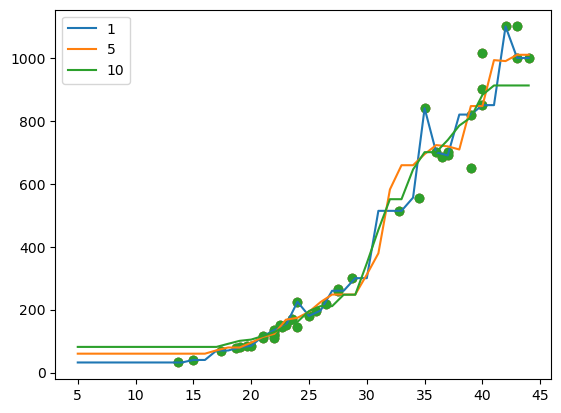

In [185]:
for n in [1, 5, 10]:
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  prediction = knr.predict(x)

  plt.scatter(train_input, train_target)
  plt.plot(x, prediction, label = f'{n}')
  plt.legend()
  print(f'{n}개')
  print('train', knr.score(train_input, train_target))
  print('test', knr.score(test_input, test_target))
  print()


- 이웃 샘플(neighbors)의 개수(n)가 커질 수록 그래프가 단순해진다.
- n이 1인 파란색과 n이 10인 초록색을 비교해 보면, 초록색 그래프가 더 완만해 지는 것을 확인할 수 있다.
